# Statistics and Analysis of Ships and Anime 

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import datetime
import ast

from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler

import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

In [2]:
# Characters who appear >10 times in the fanfiction, their names gathered into a in a csv file. Converted to pandas DF.
characters = pd.read_csv('myhero_names_rev.csv')

# Archive of Our Own
AO3 = pd.read_csv('AO3.csv')
AO3['published'] = pd.to_datetime(AO3['published'])

# Series overview: Original season number, Number of episodes, First aired, and Last aired.
og_season_anime_airdate = pd.read_csv('og_air_clean.csv')

# Season 1 Episode number overall, Episode number in the season, Title, Storyboarded by, Directed by,
#     Written by, Original air date, and English air date.
season_one_anime = pd.read_csv('season_one_clean.csv')

# Season 2-6 Episode number overall, Episode number in the season, Title, Storyboarded by, Directed by,
#     Written by, Viewership rating, Original air date, and English air date.
season_two_anime = pd.read_csv('season_two_clean.csv')
season_three_anime = pd.read_csv('season_three_clean.csv')
season_four_anime = pd.read_csv('season_four_clean.csv')
season_five_anime = pd.read_csv('season_five_clean.csv')
season_six_anime = pd.read_csv('season_six_clean.csv')

# Original Video Animation (OVA) titled "Save! Rescue Training!"
# Number (8 total released), Title, Storyboard by, Directed by, Written by, Original release date.
og_vid_animation_anime =  pd.read_csv('OVAs_clean.csv')

# Japan Home Video Release
# Season, Volume, Epsiodes, Release date.
Japan_homevid_release_anime = pd.read_csv('Japan_HV_clean.csv')

# Funimation/Crunchyroll (North America)
# Season, Volume, Episodes, Release date.
funimation_crunchyroll_anime = pd.read_csv('Fun_Crunch_NA_clean.csv')

# Universal Pictures/Manga Entertainment (UK and Ireland)
# Season, Volume, Episodes, Release date.
universalpictures_manga_anime = pd.read_csv('Up_Uk_clean.csv')

# Universal Sony/Madman Entertainment (Australia and New Zealand)
# Season, Volume, Episodes, Release date Universal, Release date Madman.
universalsony_madman_anime = pd.read_csv('Us_Me_clean.csv')

In [3]:
name_1 = [x for x in characters['1'].values]
name_2 = [x for x in (characters['2'].dropna().values)]
mhanames = name_1 + name_2


In [4]:
season_one_anime

,No.overall,No. inseason,Title,Storyboarded by,Directed by,Written by,Original_Air_Date,English_Air_Date
0,1,1,"""Izuku Midoriya: Origin""Transcription: ""Midori...",Kenji Nagasaki,Takurō Tsukada,Yōsuke Kuroda,2016-04-03,2018-05-05
1,2,2,"""What It Takes to Be a Hero""Transcription: ""Hī...",Kenji Nagasaki,Daisuke Tsukushi,Yōsuke Kuroda,2016-04-10,2018-05-12
2,3,3,"""Roaring Muscles""Transcription: ""Unare kin'nik...",Katsumi Terahigashi,Yoshifumi Sasahara,Yōsuke Kuroda,2016-04-17,2018-05-19
3,4,4,"""Start Line""Transcription: ""Sutaatorain"" (Japa...",Tōru Yoshida,Masato Miyoshi,Yōsuke Kuroda,2016-04-24,2018-06-02
4,5,5,"""What I Can Do For Now""Transcription: ""Ima Bok...",Katsuyuki Kodera,Satoshi Nakagawa,Yōsuke Kuroda,2016-05-01,2018-06-09
5,6,6,"""Rage, You Damned Nerd""Transcription: ""Takere ...",Kō Matsuo,Takurō Tsukada,Yōsuke Kuroda,2016-05-08,2018-06-16
6,7,7,"""Deku vs. Kacchan""Transcription: ""Deku bāsasu ...",Takayuki Tanaka,Geisei Morita,Yōsuke Kuroda,2016-05-15,2018-06-23
7,8,8,"""Bakugo's Start Line""Transcription: ""Sutāto Ra...",Satomi Nakamura,Yoshifumi Sasahara,Yōsuke Kuroda,2016-05-22,2018-06-30
8,9,9,"""Yeah, Just Do Your Best, Ida!""Transcription: ...",Katsuyuki Kodera,Masashi Abe,Yōsuke Kuroda,2016-05-29,2018-07-07
9,10,10,"""Encounter with the Unknown""Transcription: ""Mi...",Shinji Ishihira,Takurō Tsukada,Yōsuke Kuroda,2016-06-05,2018-07-14


In [5]:
dont_want = ['Parents', 'Suffering', 'Loss Of His Will', 'Niece', 'mentioned', 'Family', 'Notebooks', 'Character', 'quirk', 'Friend', 'Eriks', 'Werewolf', 'Prototype', 'Mother', 'Sibling', 'Sidekicks', 'l Jade', 'Nezuko']

In [6]:
AO3['ships'] = AO3['ships'].apply(ast.literal_eval)

In [7]:
Ships = AO3.explode('ships')['ships'].value_counts()

In [8]:
characters['First'] = characters['1']
characters = characters.set_index('First')

In [9]:
def pullship(char1, char2):
    name = []
    name2 = []
    try:
        for i in characters.loc[char1]:
            if type(i) != float:
                name.append(i)
    except:
        name.append(char1)
        
    try:
        for i in characters.loc[char2]:
            if type(i) != float:
                name2.append(i)
    except:
        name2.append(char2)
    ship = [name, name2]
    shipname = char1 + ' & ' + char2
    AO3[shipname] = 0
    for index, row in AO3.iterrows():
        for name in ship[0]:
            if row[shipname] == 0:
                if name in ''.join(row['ships']):
                    for name2 in ship[1]:
                        if row[shipname] == 0:
                            if name2 in ''.join(row['ships']):
                                AO3.loc[index, shipname] = 1
                                try:
                                    AO3[char1] = 1
                                    AO3.loc[index, char1] += 1
                                except:
                                    AO3[char1] = 0
                                    AO3.loc[index, char1] += 1
                                try:
                                    AO3[char2] = 1
                                    AO3.loc[index, char2] += 1
                                except:
                                    AO3[char2] = 0
                                    AO3.loc[index, char2] += 1


In [10]:
pullship('Deku', 'Katsuki')
pullship('Aizawa', 'Yamada Hizashi')
pullship('Aizawa', 'Deku')
pullship('Katsuki', 'Enjiro')
pullship('Deku', 'Todoroki Sho')
pullship('Dabi', 'Keigo')
pullship('Deku', 'Uraraka')
pullship('Deku', 'All Might')
pullship('Deku', 'Class')
pullship('Denki', 'Shinsou Hitoshi')
pullship('Deku', 'Shinsou Hitoshi')
pullship('Katsuki', 'Reader')
pullship('Katsuki', 'Todoroki Sho')
pullship('Deku', 'Yamada Hizashi')
pullship('Mina', 'Eijirou')
pullship('Jirou Kyouka', 'Denki')
pullship('Deku', 'Shigaraki Tomura')
pullship('Aizawa', 'Shinsou Hitoshi')
pullship('Deku', 'Nedzu')
pullship('Deku', 'Reader')

In [11]:
AO3 = AO3.rename(columns = {'Aizawa & Shinsou Hitoshi': 'Aizawa & Shinsou', 'Shinsou Hitoshi': 'Shinsou',
                            'Jirou Kyouka & Denki': 'Jirou & Denki','Jirou Kyouka': 'Jirou',
                            'Mina & Eijirou': 'Mina & Kirashima', 'Eijirou': 'Kirashima',
                            'Deku & Yamada Hizashi': 'Deku & Prez Mic', 'Yamada Hizashi': 'Prez Mic',
                            'Katsuki & Todoroki Sho': 'Bakugo & Shoto',
                            'Todoroki Sho': 'Shoto', 'Katsuki & Reader': 'Bakugo and Reader', 
                            'Katsuki': 'Bakugo', 'Deku & Shinsou Hitoshi': 'Deku & Shinsou',
                            'Denki & Shinsou Hitoshi': 'Denki & Shinsou', 'Dabi & Keigo': 'Dabi & Hawks',
                            'Keigo': 'Hawks', 'Deku & Todoroki Sho': 'Deku & Shoto',
                            'Katsuki & Enjiro': 'Bakugo & Kirishima', 'Deku & Katsuki': 'Deku & Bakugo',
                            'Aizawa & Yamada Hizashi': 'Aizawa & Prez Mic'})


In [12]:
AO3[1998:].explode('ships')


,title,mixed fandom,ships,characters,hits,kudos,published,Deku & Bakugo,Deku,Bakugo,...,Mina,Kirashima,Jirou & Denki,Jirou,Deku & Shigaraki Tomura,Shigaraki Tomura,Aizawa & Shinsou,Deku & Nedzu,Nedzu,Deku & Reader
1998,Boku No Hero Academia: Ones Way,['Fandoms:\n僕のヒーローアカデミア | Boku no Hero Academi...,NaN,"['Mia Ikati', 'Rue Achlys', 'Ryuuji Takao', 'I...",44,NaN,2023-03-28,0,NaN,NaN,...,NaN,NaN,0,NaN,0,NaN,0,0,NaN,0
1999,Up the Anti: My Hero Academia New Generation,['Fandoms:\n僕のヒーローアカデミア | Boku no Hero Academi...,Midoriya Izuku/Sero Hanta,"['Midoriya Izuku', 'Sero Hanta', 'Bakugou Kats...",28,NaN,2023-03-28,1,1.0,1.0,...,NaN,NaN,0,NaN,0,NaN,0,0,NaN,0
1999,Up the Anti: My Hero Academia New Generation,['Fandoms:\n僕のヒーローアカデミア | Boku no Hero Academi...,Bakugou Katsuki/Kirishima Eijirou,"['Midoriya Izuku', 'Sero Hanta', 'Bakugou Kats...",28,NaN,2023-03-28,1,1.0,1.0,...,NaN,NaN,0,NaN,0,NaN,0,0,NaN,0
1999,Up the Anti: My Hero Academia New Generation,['Fandoms:\n僕のヒーローアカデミア | Boku no Hero Academi...,Iida Tenya/Uraraka Ochako,"['Midoriya Izuku', 'Sero Hanta', 'Bakugou Kats...",28,NaN,2023-03-28,1,1.0,1.0,...,NaN,NaN,0,NaN,0,NaN,0,0,NaN,0
1999,Up the Anti: My Hero Academia New Generation,['Fandoms:\n僕のヒーローアカデミア | Boku no Hero Academi...,Todoroki Shouto/Yaoyorozu Momo,"['Midoriya Izuku', 'Sero Hanta', 'Bakugou Kats...",28,NaN,2023-03-28,1,1.0,1.0,...,NaN,NaN,0,NaN,0,NaN,0,0,NaN,0


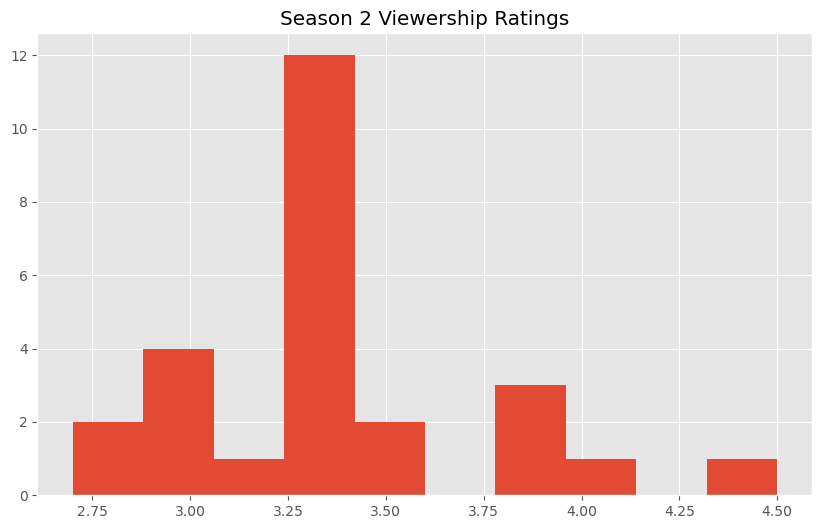

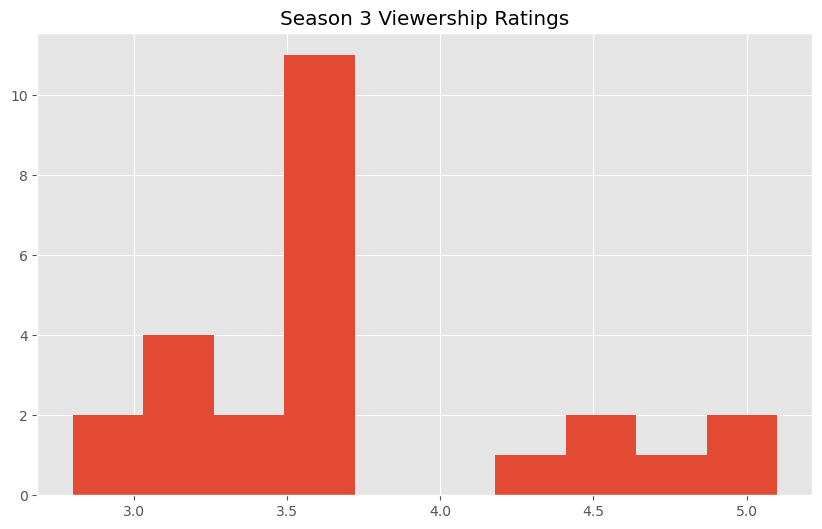

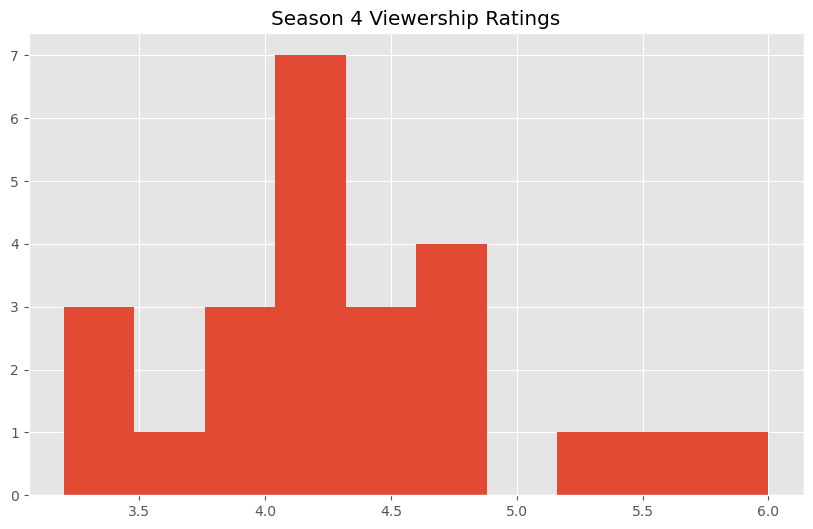

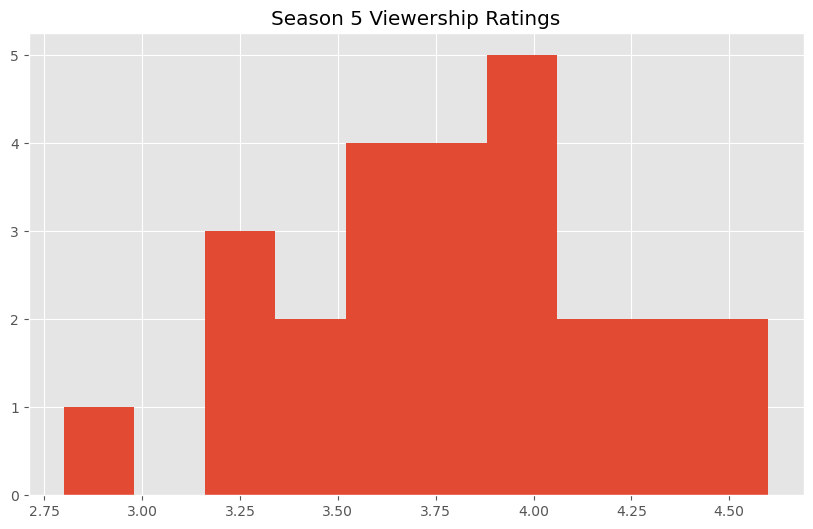

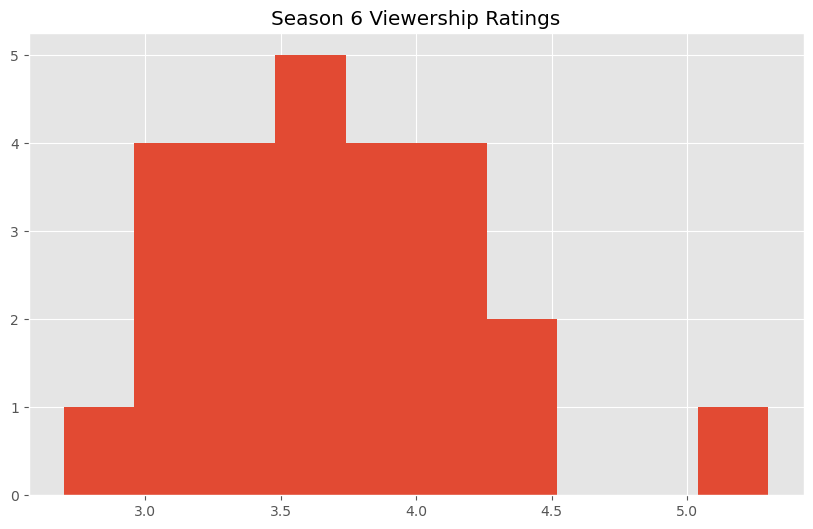

In [13]:
plt.hist(x='Viewership rating', data = season_two_anime)
plt.title('Season 2 Viewership Ratings')
plt.show()

plt.hist(x='Viewership rating', data=season_three_anime)
plt.title('Season 3 Viewership Ratings')
plt.show()

plt.hist(x='Viewership rating', data=season_four_anime)
plt.title('Season 4 Viewership Ratings')
plt.show()

plt.hist(x='Viewership rating', data=season_five_anime)
plt.title('Season 5 Viewership Ratings')
plt.show()

plt.hist(x='Viewership rating', data=season_six_anime)
plt.title('Season 6 Viewership Ratings')
plt.show()

,Deku & Bakugo,Deku,Bakugo,Aizawa & Prez Mic,Aizawa,Prez Mic,Aizawa & Deku,Bakugo & Kirishima,Enjiro,Deku & Shoto,...,Mina,Kirashima,Jirou & Denki,Jirou,Deku & Shigaraki Tomura,Shigaraki Tomura,Aizawa & Shinsou,Deku & Nedzu,Nedzu,Deku & Reader
0,0,NaN,NaN,0,NaN,NaN,0,0,NaN,0,...,NaN,NaN,0,NaN,0,NaN,0,0,NaN,0
1,0,NaN,NaN,0,NaN,NaN,0,0,NaN,0,...,NaN,NaN,0,NaN,0,NaN,0,0,NaN,0
2,0,NaN,NaN,0,NaN,NaN,0,0,NaN,0,...,NaN,NaN,0,NaN,0,NaN,0,0,NaN,0
3,0,1.0,NaN,1,1.0,1.0,1,0,NaN,0,...,NaN,NaN,0,NaN,0,NaN,1,0,NaN,0
4,1,1.0,1.0,0,NaN,NaN,0,0,NaN,0,...,NaN,NaN,0,NaN,0,NaN,0,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,NaN,NaN,0,NaN,NaN,0,0,NaN,0,...,NaN,NaN,0,NaN,0,NaN,0,0,NaN,0
1996,1,1.0,1.0,0,NaN,NaN,0,0,NaN,0,...,NaN,NaN,0,NaN,0,NaN,0,0,NaN,0
1997,1,1.0,1.0,0,NaN,NaN,0,0,NaN,1,...,NaN,NaN,0,NaN,0,NaN,0,0,NaN,0
1998,0,NaN,NaN,0,NaN,NaN,0,0,NaN,0,...,NaN,NaN,0,NaN,0,NaN,0,0,NaN,0
